In [1]:
import os, sys
import math
#sys.path.append("/zfs/nrodd/NPTF-ID-Catalog/2MASS/")
# sys.path.append("/group/hepheno/smsharma/Fermi-LSS/2MASS/")


import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
from astropy.io import fits
from tqdm import *
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck15, z_at_value
from scipy.optimize import fsolve

from units import *
# import tools
# from tools import lb2pix
import halo as hl
import Jpdf
import JBpdf
import Dpdf

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
locs_MW = ['206.97574,237.92256,100.20007',
 '100.91306,140.31874,121.97743',
 '235.23212,129.51727,210.98213',
 '231.09795,261.93268,259.68915',
 '114.25253,124.17509,207.70395',
 '153.21078,288.05563,258.05142',
 '271.37088,157.79594,148.77945',
 '201.98593,190.17067,147.6792',
 '235.49019,242.67909,193.10754',
 '256.18134,221.7271,278.78928']

In [3]:
cat_ds = []
cat_ds_MW = []


for loc in ["200,200,200","100,100,100","100,100,300","100,300,100","300,100,100","300,300,100","100,300,300","300,100,300", "300,300,300"]:

    # for loc in locs_MW:
    cat_ds.append(pd.read_csv("../DataFiles/Catalogs/DarkSky_ALL_"+loc+"_v3.csv"))
      
for loc in locs_MW:
    cat_ds_MW.append(pd.read_csv("../DataFiles/Catalogs/DarkSky_MWlike_"+loc+"_v4.csv"))


    
cat_tully = pd.read_csv("../DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")
cat_lu = pd.read_csv("../DataFiles/Catalogs/2MRSLu_ALL_DATAPAPER_Planck15_v5.csv")

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
logJ_lu = cat_lu['mulog10J_inf'].values[:1000]
logJ_tully = cat_tully['mulog10J_inf'].values[1:1000]
logJ_ds = []
logJ_ds_MW = []
for i in range(9):
    logJ_ds.append(cat_ds[i]['mulog10J_inf'].values[:1000])
for i in range(10):
    logJ_ds_MW.append(cat_ds_MW[i]['mulog10J_inf'].values[:1000])

In [5]:
logJ_ds_hist = []
logJ_ds_MW_hist = []

for i in range(9):
    logJ_ds_hist.append(np.histogram(logJ_ds[i], bins=np.linspace(16,19,20))[0])
    
for i in range(10):
    logJ_ds_MW_hist.append(np.histogram(logJ_ds_MW[i], bins=np.linspace(16,19,20))[0])

In [6]:
logM_lu = cat_lu['log10Mvir_inf'].values[:1000]
logM_tully = cat_tully['log10Mvir_inf'].values[1:1000]
logM_ds = []
logM_ds_MW = []


for i in range(9):
    logM_ds.append(cat_ds[i]['logMvir_inf'].values[:1000])
for i in range(10):
    logM_ds_MW.append(cat_ds_MW[i]['logMvir_inf'].values[:1000])

In [7]:
logM_ds_hist = []
logM_ds_MW_hist = []

for i in range(9):
    logM_ds_hist.append(np.histogram(logM_ds[i], bins=np.linspace(11,16,20))[0])
    
for i in range(10):
    logM_ds_MW_hist.append(np.histogram(logM_ds_MW[i], bins=np.linspace(11,16,20))[0])

In [8]:
z_lu = cat_lu['z'].values[:1000]
z_tully = cat_tully['z'].values[1:1000]
z_ds = []
z_ds_MW = []

for i in range(9):
    z_ds.append(cat_ds[i]['z'].values[:1000])
    
for i in range(10):
    z_ds_MW.append(cat_ds_MW[i]['z'].values[:1000])

In [9]:
z_ds_hist = []
z_ds_MW_hist = []

for i in range(9):
    z_ds_hist.append(np.histogram(z_ds[i], bins=np.linspace(0,0.03,20))[0])
    
for i in range(10):
    z_ds_MW_hist.append(np.histogram(z_ds_MW[i], bins=np.linspace(0,0.03,20))[0])

In [10]:
ds_16 = np.repeat(np.percentile(logJ_ds_hist,16,axis=0),2)
ds_50 = np.repeat(np.percentile(logJ_ds_hist,50,axis=0),2)
ds_84 = np.repeat(np.percentile(logJ_ds_hist,84,axis=0),2)

ds_MW_16 = np.repeat(np.percentile(logJ_ds_MW_hist,16,axis=0),2)
ds_MW_50 = np.repeat(np.percentile(logJ_ds_MW_hist,50,axis=0),2)
ds_MW_84 = np.repeat(np.percentile(logJ_ds_MW_hist,84,axis=0),2)

In [11]:
ds_m_16 = np.repeat(np.percentile(logM_ds_hist,16,axis=0),2)
ds_m_50 = np.repeat(np.percentile(logM_ds_hist,50,axis=0),2)
ds_m_84 = np.repeat(np.percentile(logM_ds_hist,84,axis=0),2)

ds_m_MW_16 = np.repeat(np.percentile(logM_ds_MW_hist,16,axis=0),2)
ds_m_MW_50 = np.repeat(np.percentile(logM_ds_MW_hist,50,axis=0),2)
ds_m_MW_84 = np.repeat(np.percentile(logM_ds_MW_hist,84,axis=0),2)

In [12]:
ds_z_16 = np.repeat(np.percentile(z_ds_hist,16,axis=0),2)
ds_z_50 = np.repeat(np.percentile(z_ds_hist,50,axis=0),2)
ds_z_84 = np.repeat(np.percentile(z_ds_hist,84,axis=0),2)

ds_z_MW_16 = np.repeat(np.percentile(z_ds_MW_hist,16,axis=0),2)
ds_z_MW_50 = np.repeat(np.percentile(z_ds_MW_hist,50,axis=0),2)
ds_z_MW_84 = np.repeat(np.percentile(z_ds_MW_hist,84,axis=0),2)

In [15]:
logJ_hif = np.log10(np.load("Jf_HIFLUGCS.npy"))
logM_hif = np.log10(np.load("mvir_HIFLUGCS.npy"))
z_hif = (np.load("z_HIFLUGCS.npy"))

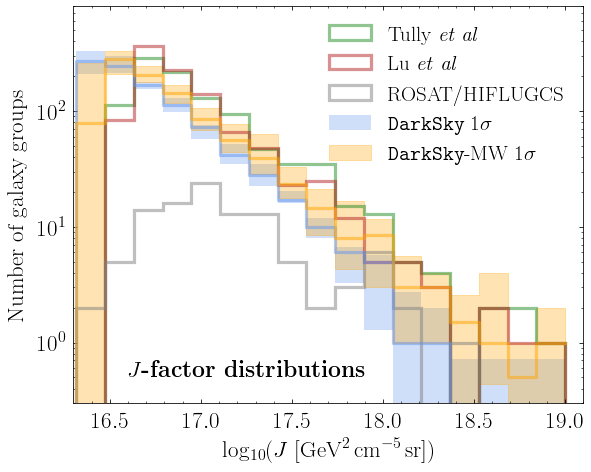

In [16]:
plot_h = 10/1.2
plot_w = 8/1.2

bins=np.linspace(16,19,20)

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

# for i in range(9):
#     plt.hist(logJ_ds[i], histtype='step', label='\\texttt{DarkSky}', lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_16,ds_84, alpha=0.3, label="\\texttt{DarkSky} 1$\sigma$")
plt.plot(np.repeat(bins,2)[1:-1], ds_50, lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_MW_16,ds_MW_84, alpha=0.3, label="\\texttt{DarkSky}-MW 1$\sigma$", color='orange')
plt.plot(np.repeat(bins,2)[1:-1], ds_MW_50, lw=3.2, alpha=0.5, color='orange')


# plt.hist(logJ_tully, histtype='step', label=r"\texttt{DarkSky} 1$\sigma$", lw=3.2, alpha=0.5, bins=np.linspace(16,19,20), color='cornflowerblue')


plt.hist(logJ_tully, histtype='step', label='{Tully \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(16,19,20), color='forestgreen')
plt.hist(logJ_lu,  histtype='step', label='{Lu \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(16,19,20), color='firebrick')
plt.hist(logJ_hif,  histtype='step', label='{ROSAT/HIFLUGCS}', lw=3.2, alpha=0.5, bins=np.linspace(16,19,20), color='grey')


plt.yscale("log")
plt.ylim(0.3,800)
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"log$_{10}(J$ [GeV$^2$\,cm$^{-5}$\,sr])",fontsize=23)
# plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(16.3,19.1)
plt.legend(fontsize=21,fancybox=True,facecolor='none',frameon=False)

plt.text(16.6, .5, "\\textbf{$J$-factor distributions}", fontsize=23)

plt.ylabel("Number of galaxy groups", fontsize=23)

plt.tight_layout()

plt.savefig("cat_jfactors.pdf")

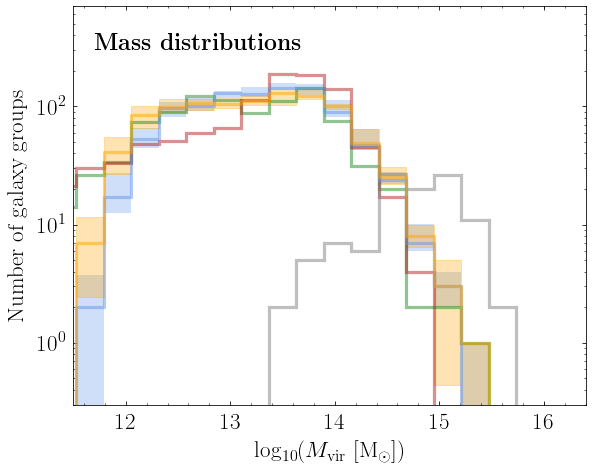

In [17]:
plot_h = 10/1.2
plot_w = 8/1.2

bins=np.linspace(11,16,20)

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

# for i in range(9):
#     plt.hist(logM_ds[i], histtype='step', label='\\texttt{DarkSky}', lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_m_16,ds_m_84, alpha=0.3, label="\\texttt{DarkSky} 1$\sigma$")
plt.plot(np.repeat(bins,2)[1:-1], ds_m_50, lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_m_MW_16,ds_m_MW_84, alpha=0.3, label="\\texttt{DarkSky}-MW 1$\sigma$", color='orange')
plt.plot(np.repeat(bins,2)[1:-1], ds_m_MW_50, lw=3.2, alpha=0.5, color='orange')


# plt.hist(logM_tully, histtype='step', label=r"\texttt{DarkSky} 1$\sigma$", lw=3.2, alpha=0.5, bins=np.linspace(11,16,20), color='cornflowerblue')
plt.hist(logM_tully, histtype='step', label='{Tully \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(11,16,20), color='forestgreen')
plt.hist(logM_lu,  histtype='step', label='{Lu \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(11,16,20), color='firebrick')
plt.hist(logM_hif,  histtype='step', label='{ROSAT/HIFLUGCS}', lw=3.2, alpha=0.5, bins=np.linspace(11,16,20), color='grey')

plt.yscale("log")

plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"log$_{10}(M_\mathrm{vir}~[\mathrm{M}_\odot])$",fontsize=23)
# plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
# plt.xlim(16.3,19.1)
# plt.legend(fontsize=21,fancybox=True,facecolor='none',frameon=False, loc='upper right')

# plt.text(16.6, .3, "\\textbf{$J$-factor distributions}", fontsize=23)

plt.ylabel("Number of galaxy groups", fontsize=23)

plt.text(11.7, 300, "\\textbf{Mass distributions}", fontsize=23)

plt.xlim(11.5,16.4)
plt.ylim(0.3, 700)
plt.tight_layout()


plt.savefig("cat_masses.pdf")

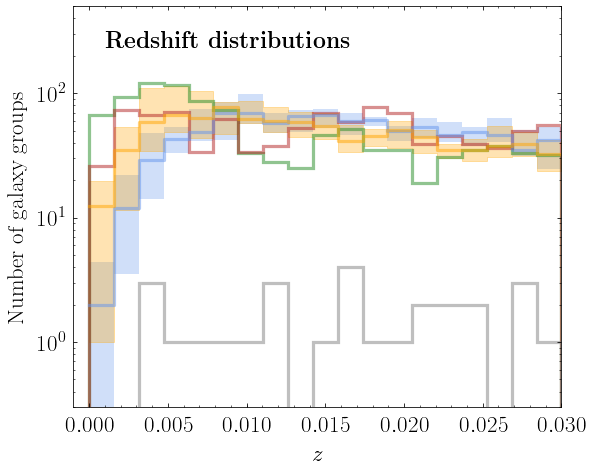

In [18]:
plot_h = 10/1.2
plot_w = 8/1.2

bins=np.linspace(0,0.03,20)

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

# for i in range(9):
#     plt.hist(logM_ds[i], histtype='step', label='\\texttt{DarkSky}', lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_z_16,ds_z_84, alpha=0.3, label="\\texttt{DarkSky} 1$\sigma$")
plt.plot(np.repeat(bins,2)[1:-1], ds_z_50, lw=3.2, alpha=0.5)

plt.fill_between(np.repeat(bins,2)[1:-1], ds_z_MW_16,ds_z_MW_84, alpha=0.3, label="\\texttt{DarkSky}-MW 1$\sigma$", color='orange')
plt.plot(np.repeat(bins,2)[1:-1], ds_z_MW_50, lw=3.2, alpha=0.5, color='orange')


# plt.hist(logM_tully, histtype='step', label=r"\texttt{DarkSky} 1$\sigma$", lw=3.2, alpha=0.5, bins=np.linspace(11,16,20), color='cornflowerblue')
plt.hist(z_tully, histtype='step', label='{Tully \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(0,0.03,20), color='forestgreen')
plt.hist(z_lu,  histtype='step', label='{Lu \emph{et al}}', lw=3.2, alpha=0.5, bins=np.linspace(0,0.03,20), color='firebrick')
plt.hist(z_hif,  histtype='step', label='ROSAT/HIFLUGCS', lw=3.2, alpha=0.5, bins=np.linspace(0,0.03,20), color='grey')

plt.yscale("log")

plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$z$",fontsize=23)
# plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
# plt.xlim(16.3,19.1)
# plt.legend(fontsize=21,fancybox=True,facecolor='none',frameon=False, loc="upper right", ncol = 2, columnspacing=0.1)

# plt.text(16.6, .3, "\\textbf{$J$-factor distributions}", fontsize=23)

plt.ylabel("Number of galaxy groups", fontsize=23)

plt.text(0.001, 230, "\\textbf{Redshift distributions}", fontsize=23)
# plt.text(0.0038, 0.37, "\\textbf{distributions}", fontsize=23)


plt.ylim(0.3,500)

plt.xlim(-0.001,0.03)
plt.tight_layout()



plt.savefig("cat_redshifts.pdf")